In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Task 1 #

Имеется датасет для предсказания оценок студентов. Но мы возьмём немного измененную версию данных, скачать датасет.

Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=10.

Целевой признак grade: 0 - оценка ниже среднего, 1 - оценка выше среднего.

Обучите логистическую регрессию из sklearn на базовых параметрах для решения поставленной задачи и укажите вес, который получился после обучения модели, при признаке studytime, округлив его до второго знака после точки.

In [34]:
data = pd.read_csv('./student.csv', delimiter=',')

In [35]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,2
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
 13  grade       649 non-null    int64
dtypes: int64(14)
memory usage: 71.1 KB


In [37]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,1.244992
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,0.430414
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,2.000000


In [38]:
data.grade.unique()

array([1, 2], dtype=int64)

In [39]:
g= set(data.grade)
g

{1, 2}

<Axes: xlabel='grade', ylabel='Density'>

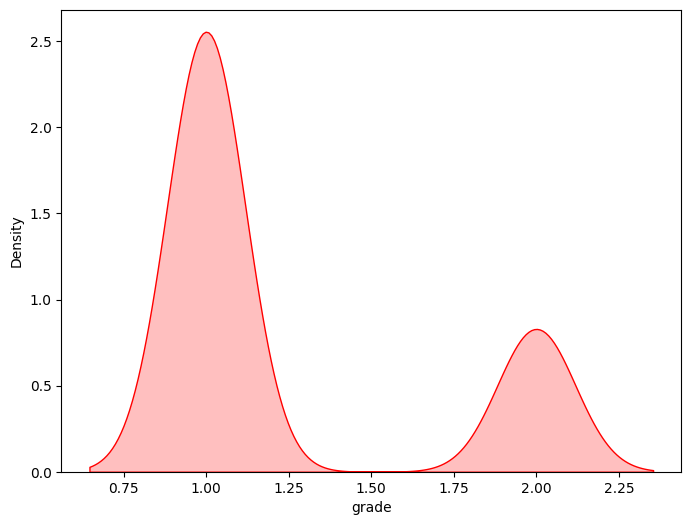

In [40]:
plt.figure(figsize = (8,6))
sns.kdeplot(data['grade'], color='red', fill=True)

In [41]:
X = data.drop(['grade'], axis=1)
y = data.grade

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=10)

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train, y_train)

c:\Users\Сергей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = lr.predict(x_test)

Answer 1:

In [46]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [47]:
lr.coef_

array([[ 0.18371139,  0.46279186,  0.02488852, -0.14084608,  0.38231807,
        -1.3310031 ,  0.00314937,  0.0512351 , -0.01806686, -0.66531353,
         0.02035168, -0.13587079, -0.05586456]])

# Task 2 #

Продолжайте работать с данными с предыдущего задания.

Вероятней всего (если у вас не отключены предупреждения) Python выдал 

ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT., 

такое встречается, если в данных есть признаки разных масштабов. Давайте исправим это с помощью масштабирования данных через стандартизацию.

    Обучите модель StandardScaler на тренировочной выборке.

    Преобразуйте тренировочные и тестовые данных с помощью стандартизации

    Укажите, какие диапазоны получились у признака age на тестовой выборке - значение min и max. 

In [48]:
scaler = StandardScaler()

In [49]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

Answer 2:

In [50]:
x_test_sc[0].max(), x_test_sc[0].min()

(1.4472049689440991, -1.4934517300414538)

# Task 3 #

Продолжайте работать с масштабированными данными с предыдущего задания.

Обучите модель логистической регрессии с базовыми параметрами на стандартизованных данных и посчитайте метрику accuracy на тренировочной и тестовой выборках и укажите их, округлив до второго знака после точки.

In [51]:
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [52]:
y_pred_sc = lr.predict(x_test_sc)

Answer 3:

In [53]:
accuracy_tst = accuracy_score(y_test, y_pred_sc)
f'{accuracy_tst:.2f}'

'0.78'

In [54]:
accuracy_train = accuracy_score(y_train, lr.predict(x_train_sc))
f'{accuracy_train:.2f}'

'0.76'

# Task 4 #

Продолжайте работать с данными с предыдущего задания.

Возьмите НЕ масштабированные данные, т.к. сейчас будем их усложнять для более качественной модели.

Для удобства можете пользоваться pipeline из sklearn, в котором будут:

    Модель полиномизации признаков до 4 степени PolynomialFeatures

    Модель масштабирования данных StandardScaler

    Логистическая регрессия БЕЗ регуляризации

По умолчанию в логистической регрессии в sklearn есть L2 регуляризация, чтобы её отключить, нужно поменять параметр penalty.

Обучите пайплайн на тренировочной выборке и посчитайте метрику accuracy на тренировочной и тестовой выборках и укажите их, округлив до второго знака после точки.

In [55]:
pipe = Pipeline(
    [
        ('PF', PolynomialFeatures(degree=4)),
        ('scaler', StandardScaler()),
        ('LR', LogisticRegression(penalty=None))
    ]
)

In [56]:
pipe.fit(x_train, y_train)

c:\Users\Сергей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('PF', PolynomialFeatures(degree=4)),
                ('scaler', StandardScaler()),
                ('LR', LogisticRegression(penalty=None))])

In [57]:
pipe.predict(x_test)

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1],
      dtype=int64)

Answer 4:

In [58]:
accuracy_train_5 = accuracy_score(y_train, pipe.predict(x_train))
f'{accuracy_train_5:.2f}'

'0.95'

In [59]:
accuracy_test_5 = accuracy_score(y_test, pipe.predict(x_test))
f'{accuracy_test_5:.2f}'

'0.68'

# Task 5 #

Продолжайте работать с данными с предыдущего задания.

Снова вероятней всего (если у вас не отключены предупреждения) Python выдал ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT., хотя масштабирование данных сделано, так же эту ошибку можно избежать, если увеличить количество итераций в логистической регрессии, увеличьте параметр max_iter до 600.

Так же метрика на тесте стала меньше, потому что модель переобучается, нужно и это исправить с помощью регуляризации.

Для удобства можете пользоваться pipeline из sklearn, в котором будут:

    Модель полиномизации признаков до 4 степени PolynomialFeatures

    Модель масштабирования данных StandardScaler

    Логистическая регрессия с L2 регуляризацией

Сделайте перебор параметра C в логистической регрессии, который из себя представляет 1/коэффициент регуляризации. Значения C перебирайте из следующего списка: [0.0001, 0.001, 0.01, 0.1, 1].

Укажите, самую лучшую метрику на тесте, округлив её до второго знака после точки

In [60]:
param_grid = [0.0001, 0.001, 0.01, 0.1, 1]

best_score = 0

for C in param_grid:
    pipe6 = Pipeline([
        ('poly', PolynomialFeatures()),
        ('scaler', StandardScaler()),
        ('LR', LogisticRegression(C=C, penalty='l2', max_iter=600))
    ])
    pipe6.fit(x_train, y_train)
    y_pred = pipe6.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
    print(f'{score:.2f}')
best_score

0.81
0.81
0.78
0.78
0.83


0.8307692307692308

In [61]:

# pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', max_iter=600))
])

# Параметры для перебора
param_grid = {
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1]
}

# GridSearch с 5-кратной кросс-валидацией
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)

# Предсказание на тесте
y_pred = grid.predict(x_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Лучшая метрика на тесте: {test_score:.2f}")
print(f"Лучшее значение C: {grid.best_params_['logreg__C']}")


Лучшая метрика на тесте: 0.81
Лучшее значение C: 0.0001
